In [74]:
#importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

strokeData=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [75]:
strokeData.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observation: Average age is 43 years old.

There were more patients in this dataset who have not had a stroke.

Hyper tension and heart disease average between .09-.05 so not much people in the data are having any of these syptoms.

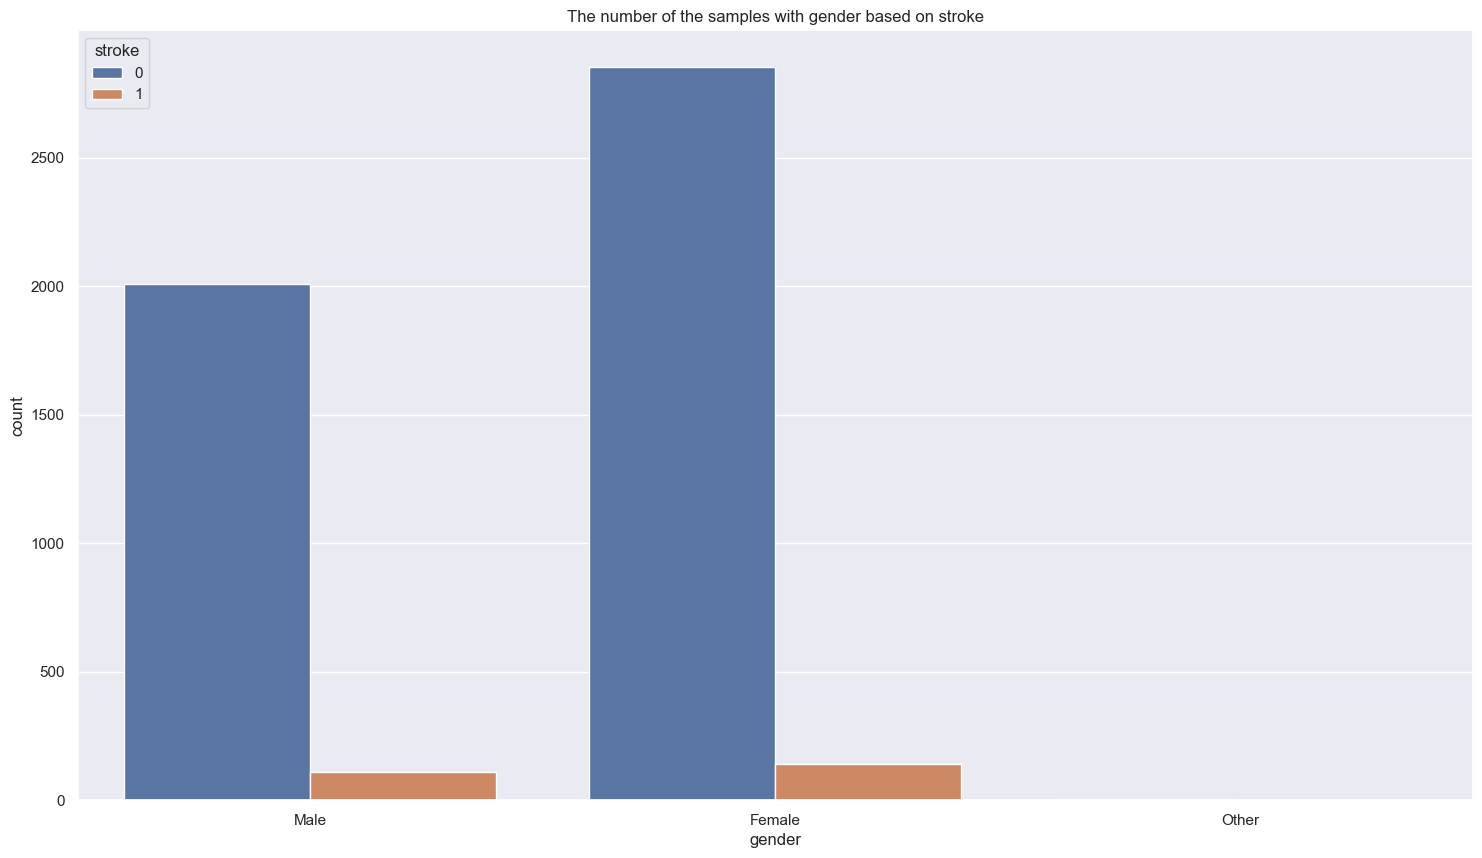

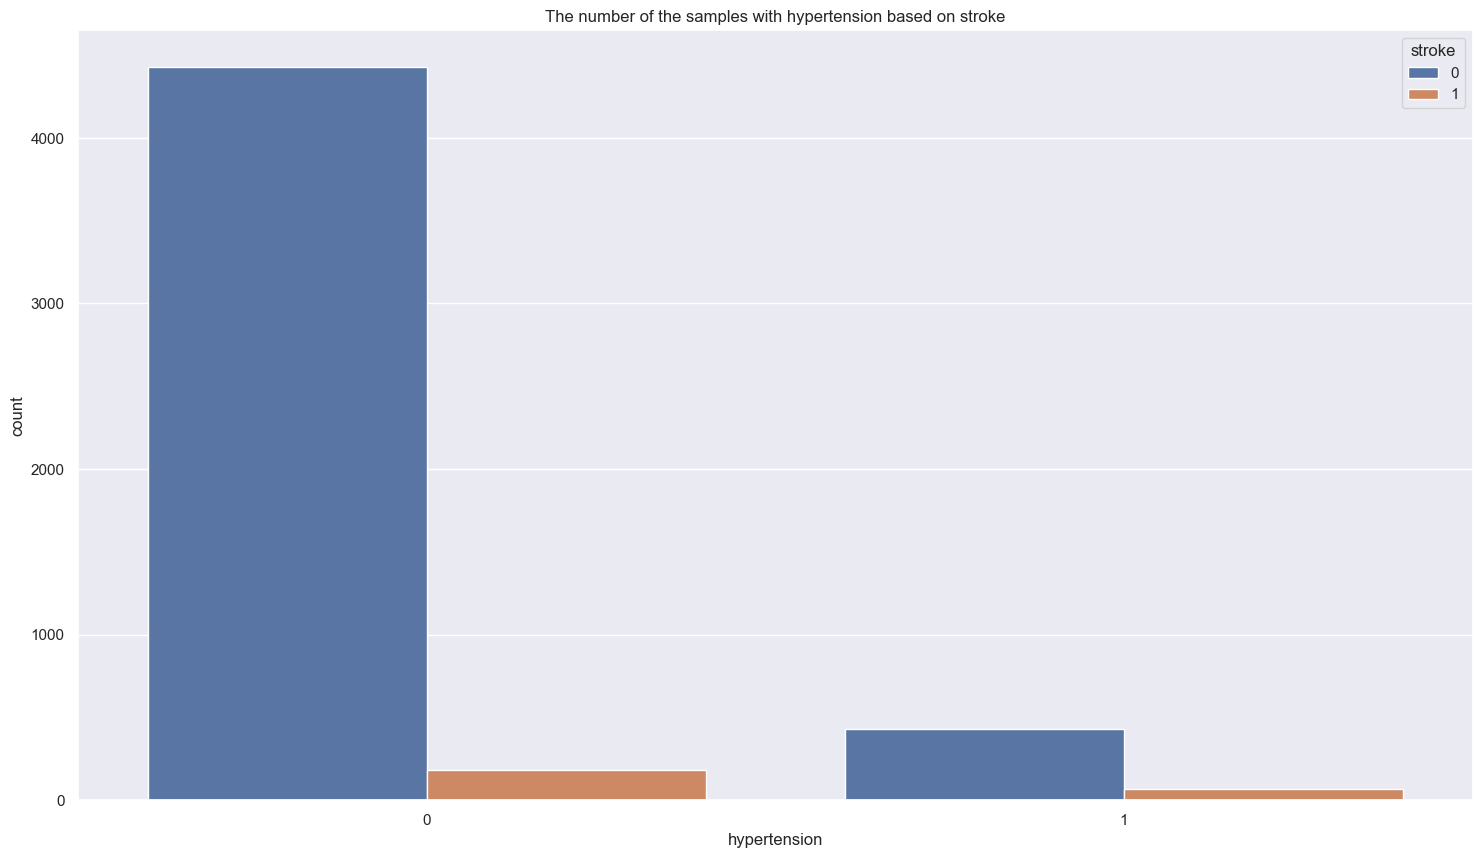

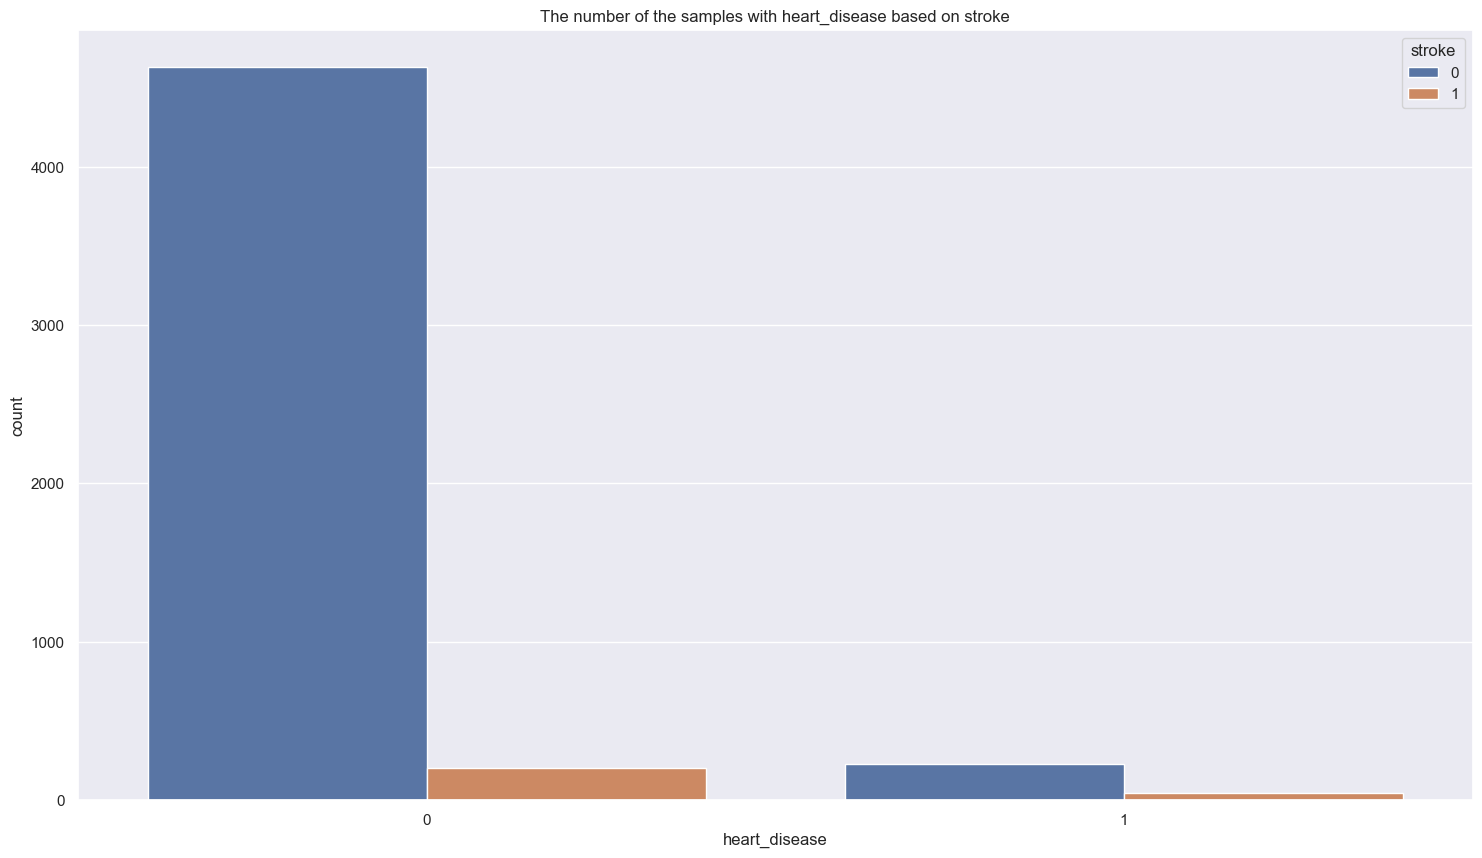

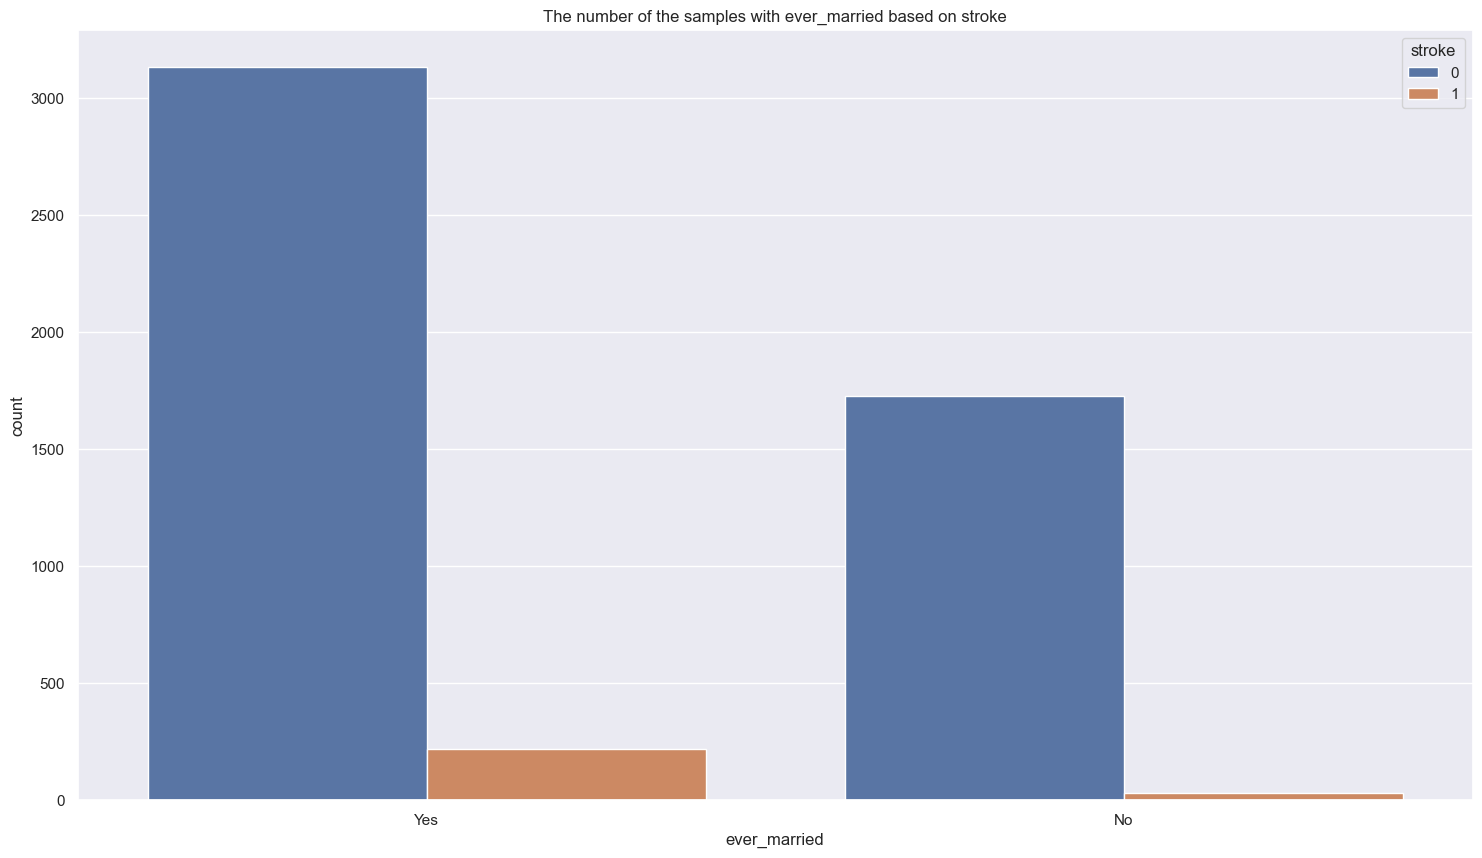

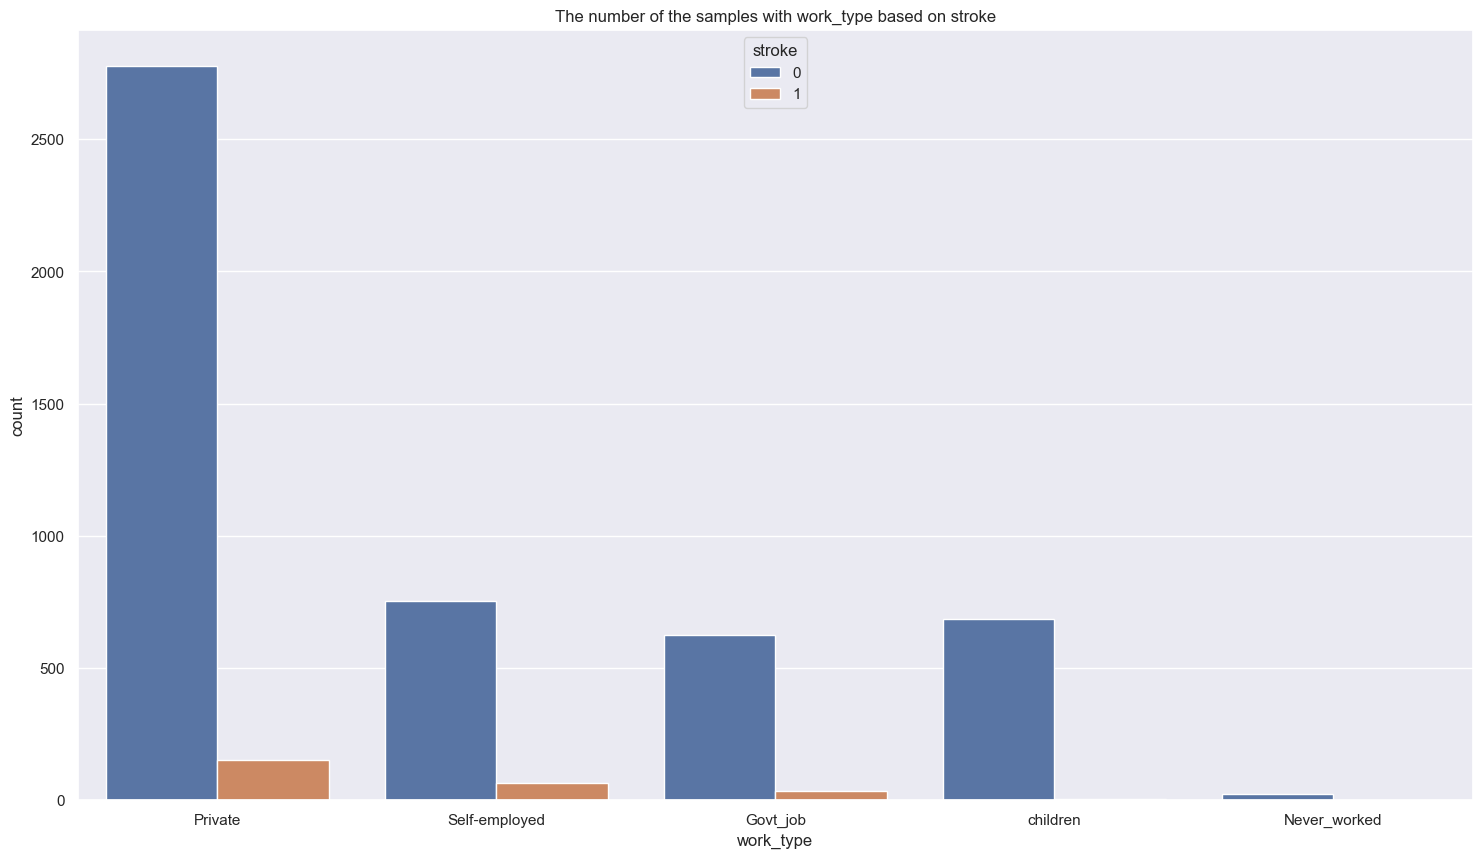

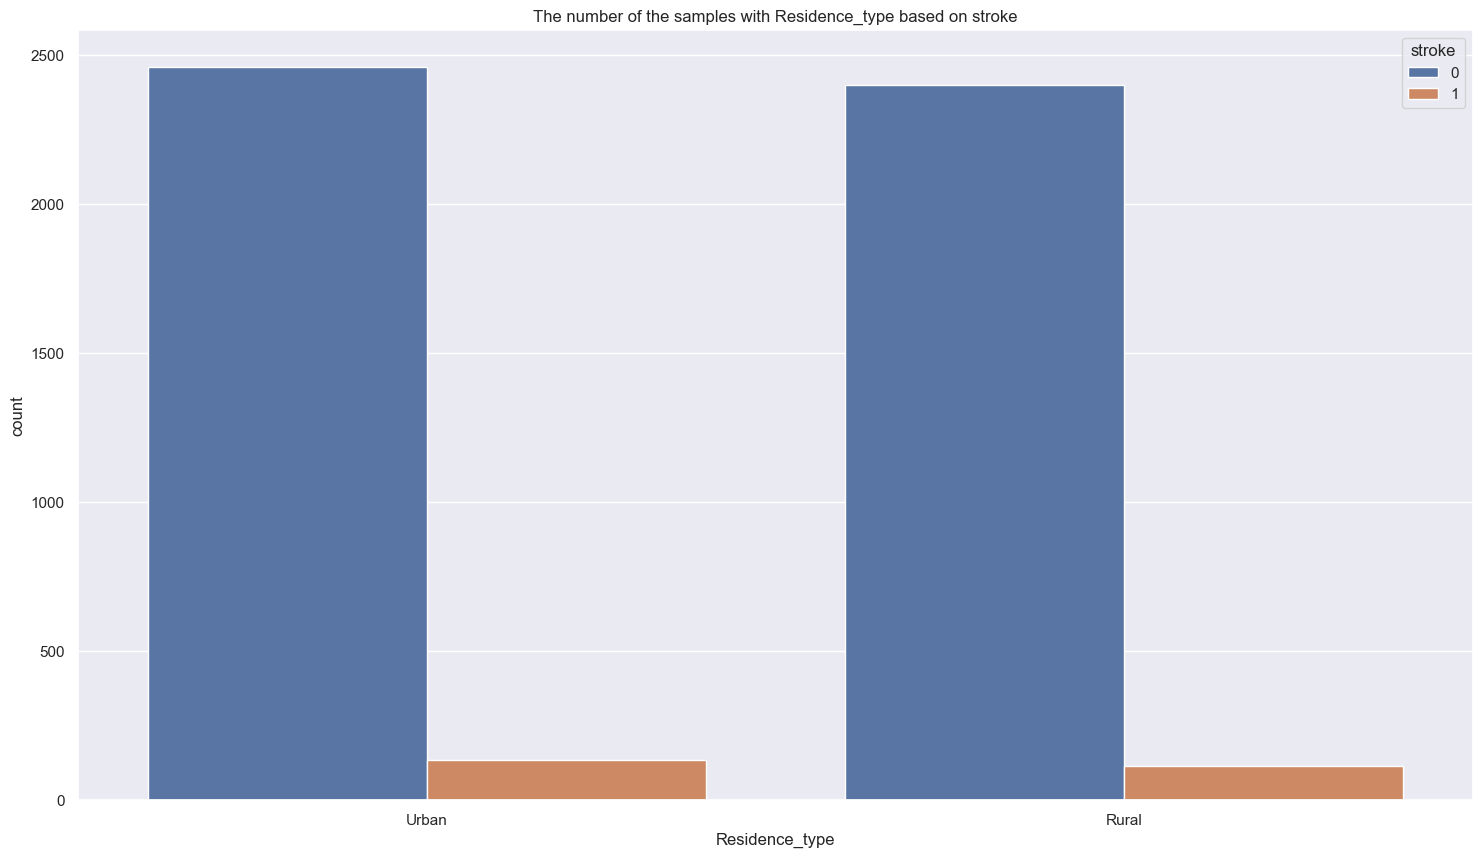

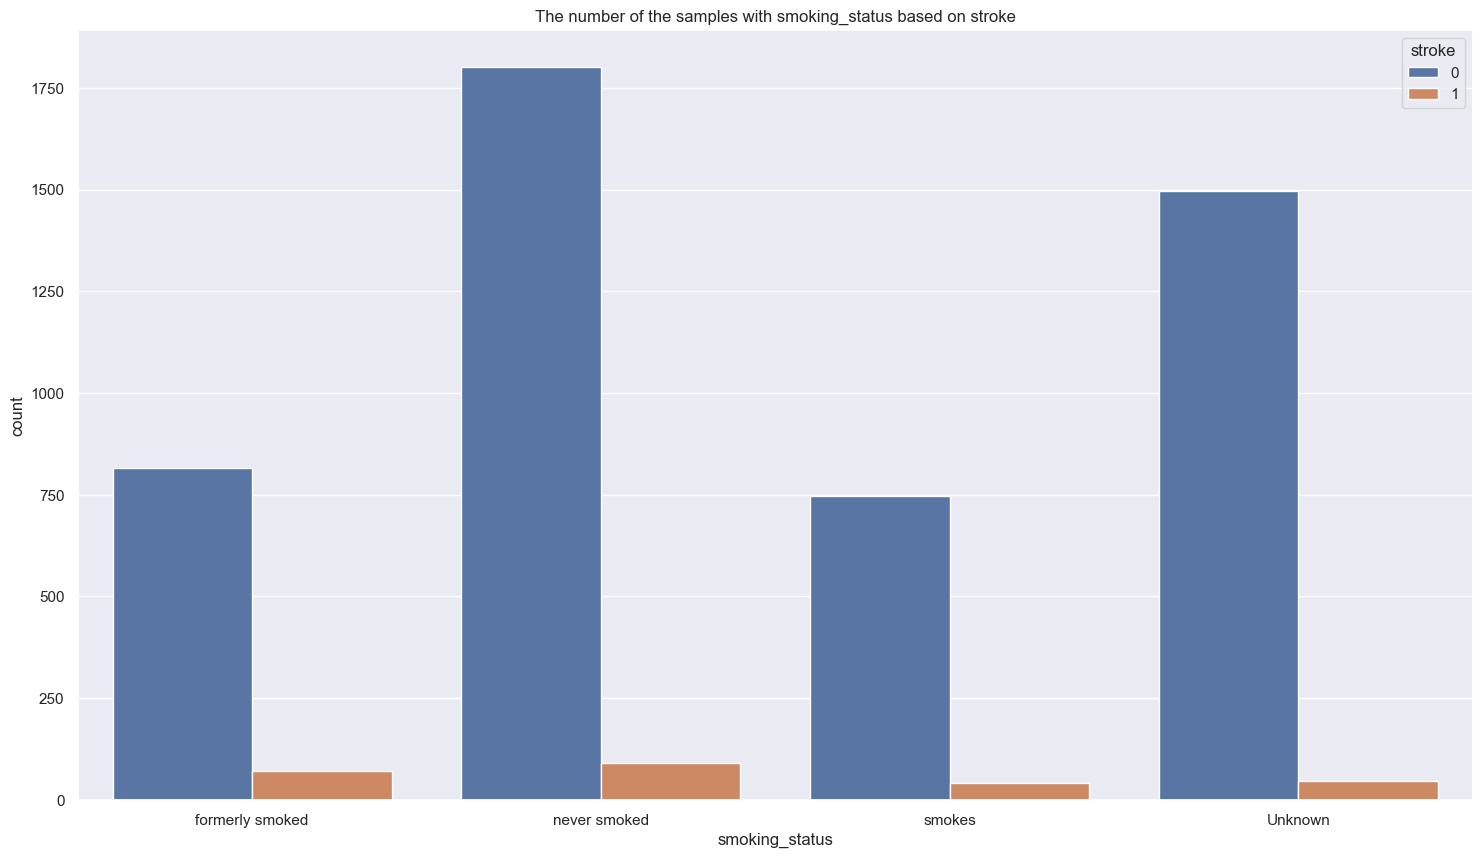

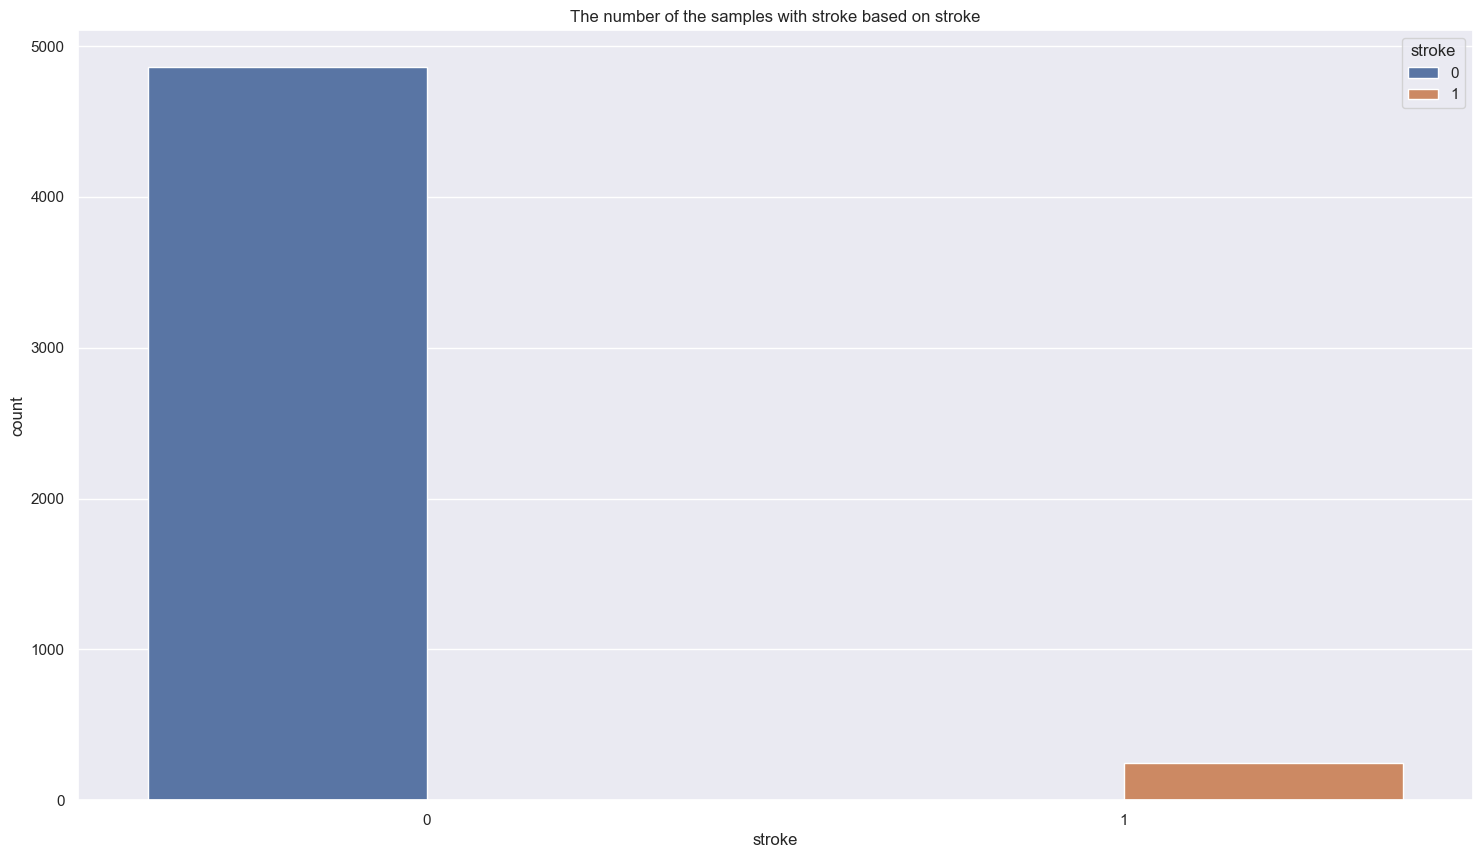

In [76]:
for i in strokeData.columns[1:]:
    if (strokeData[i].dtype =='object') or (strokeData[i].dtypes=='int64'):
        sns.countplot(data = strokeData, x = i,hue='stroke')
        plt.title('The number of the samples with {} based on stroke'.format(i))
        plt.show()

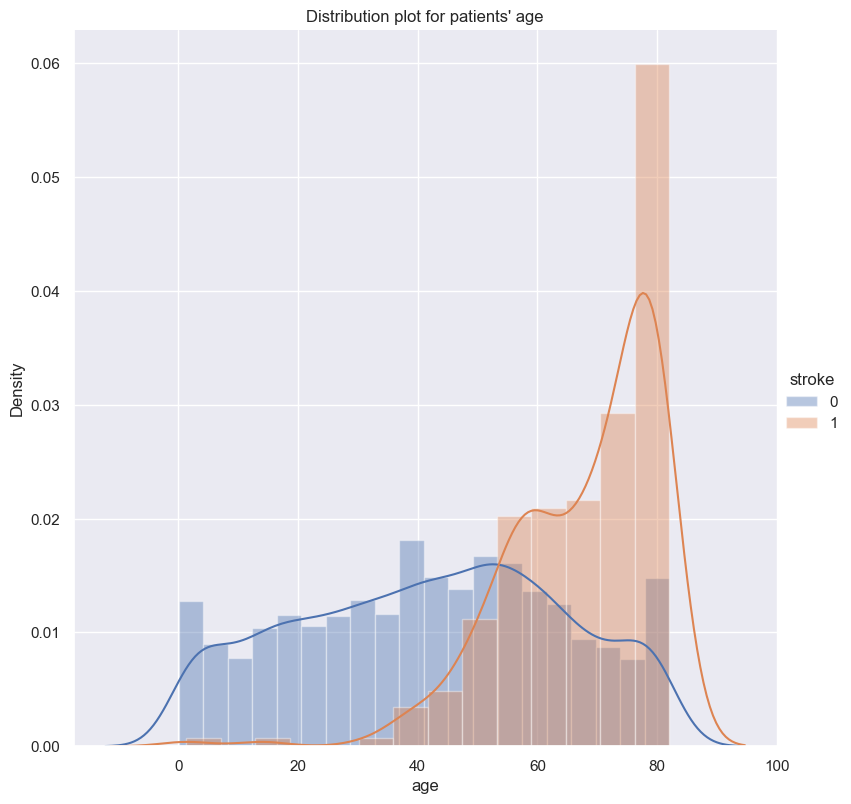

In [77]:
sns.set(rc={'figure.figsize':(18,10)})
sns.FacetGrid(strokeData, hue="stroke", height = 8).map(sns.distplot, "age").add_legend()
plt.title("Distribution plot for patients' age")
plt.show()

## The higher the age the more chances of having a stroke rises.

Text(0, 0.5, 'Age of Patient')

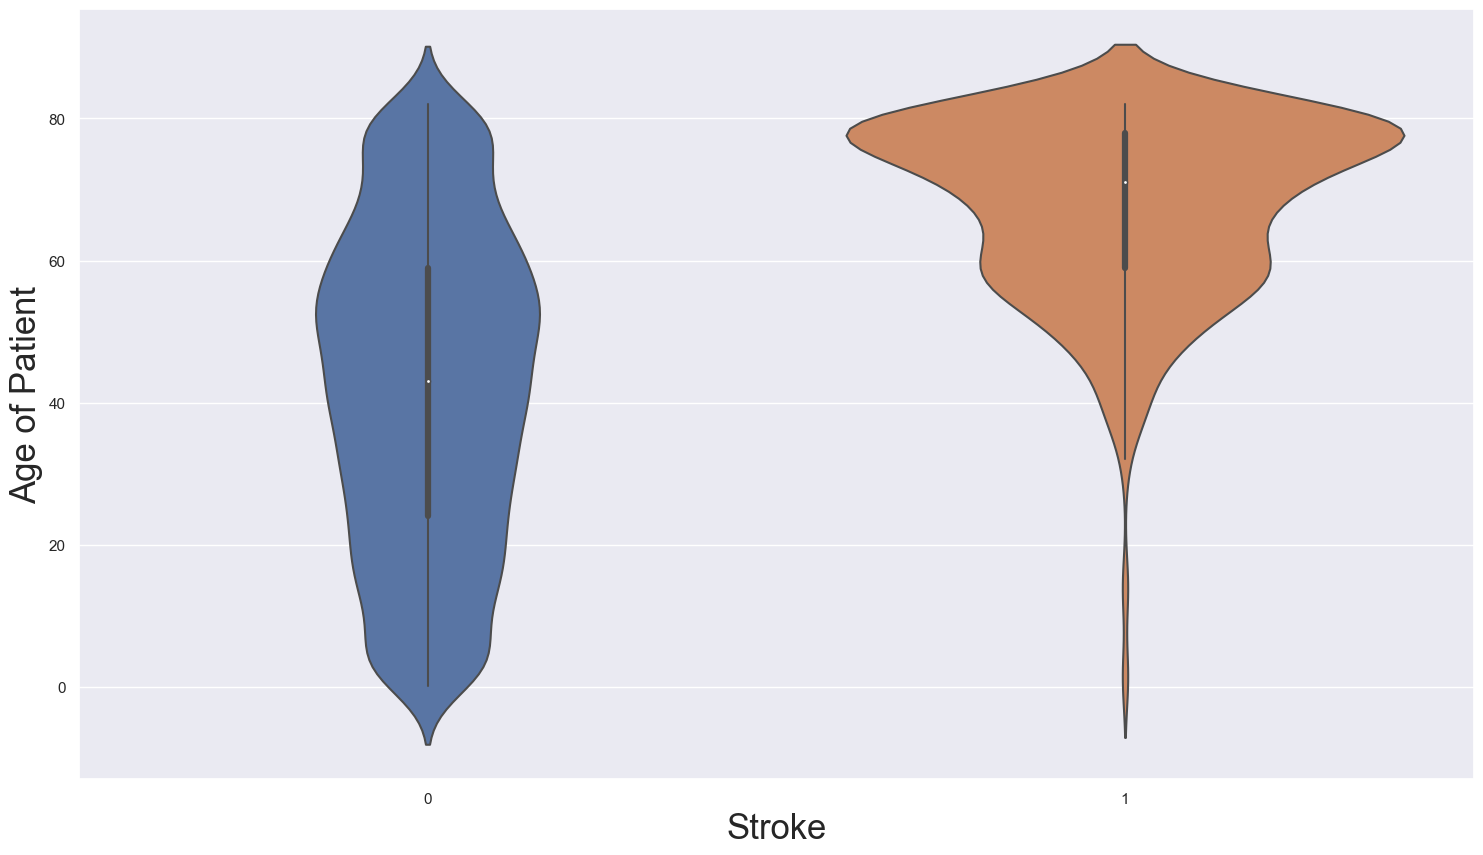

In [78]:
sns.set(rc={'figure.figsize':(18,10)})
seaborn_plot = sns.violinplot(x='stroke',y='age', data=strokeData)
seaborn_plot.set_xlabel("Stroke",fontsize=25)
seaborn_plot.set_ylabel("Age of Patient",fontsize=25)

#Number 5: the data set is imbalance because it only has a small percentage of people having stroked at ages from 70-80

## The chances of getting a stroke is at the highest when the patient's age is between 60-80. But the peak is like at 76.

Text(0.5, 1.0, 'Heatmap Correlation')

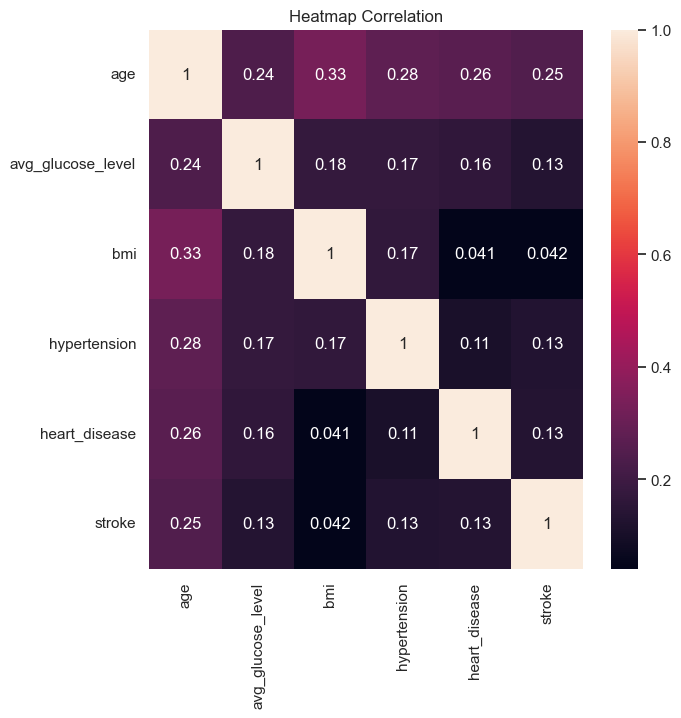

In [79]:
# Select the columns for the correlation matrix
selected_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']
corr_data = strokeData[selected_cols].corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(7, 7))
heatmap = sns.heatmap(corr_data, vmax=1, annot=True)
heatmap.set_title('Heatmap Correlation')

In [80]:
strokeData[1:].corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003806,0.003467,-0.000233,0.001782,0.003352,0.007527
age,0.003806,1.000000,0.276498,0.263415,0.237810,0.333256,0.244843
hypertension,0.003467,0.276498,1.000000,0.108763,0.174775,0.167892,0.128435
heart_disease,-0.000233,0.263415,0.108763,1.000000,0.160030,0.040565,0.131772
avg_glucose_level,0.001782,0.237810,0.174775,0.160030,1.000000,0.175102,0.129946
bmi,0.003352,0.333256,0.167892,0.040565,0.175102,1.000000,0.041525
stroke,0.007527,0.244843,0.128435,0.131772,0.129946,0.041525,1.000000


Age and BMI shows the strongest correlation. So age and BMI can be a major role in people having a stroke.

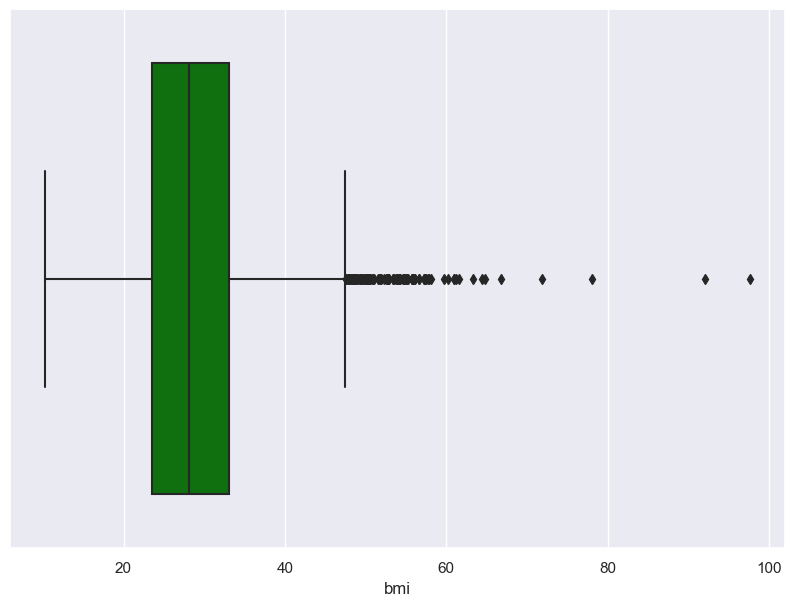

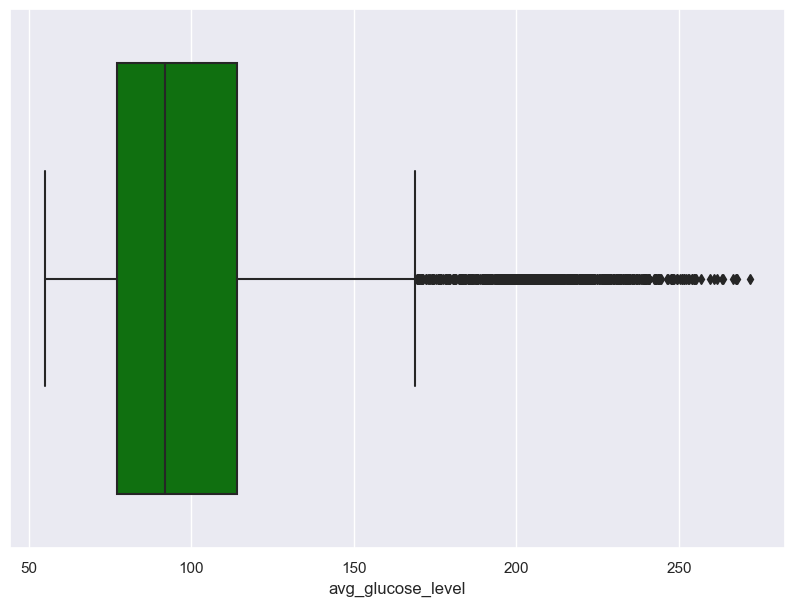

In [81]:
plt.figure(figsize=(10,7))
sns.boxplot(data=strokeData,x=strokeData["bmi"],color='green');


plt.figure(figsize=(10,7))
sns.boxplot(data=strokeData,x=strokeData["avg_glucose_level"],color='green');

In [82]:
bmi_outliers=strokeData.loc[strokeData['bmi']>50]
avg_glucose_level= strokeData.loc[strokeData['avg_glucose_level'] > 175]

strokeData["bmi"] = strokeData["bmi"].apply(lambda x: 50 if x>50 else x)
strokeData['avg_glucose_level']= strokeData['avg_glucose_level'].apply(lambda x: 175 if x > 175 else x)

In [83]:
strokeData.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [84]:
strokeData['bmi']=strokeData['bmi'].fillna(strokeData['bmi'].mean())

In [85]:
le=LabelEncoder()

for i in strokeData.columns[1:]:
    if(strokeData[i].dtype=='object'):
        strokeData[i]=le.fit_transform(strokeData[i])

In [86]:
strokeData.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,175.00,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,175.00,28.791465,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1


In [87]:
le.inverse_transform(strokeData['Residence_type'].unique())

array(['formerly smoked', 'Unknown'], dtype=object)

# Project 2 starts here!

In [101]:
#imported necccesary libraries for project 2
# these were the libraries i believed were neccesarry for Project 2 
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [102]:
#Step 1:Split the dataset into training and testing sets

X = strokeData.drop(columns=["stroke"])
y = strokeData["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
#Dataset is imbalanced, solve this problem by using SMOTE.

smote = SMOTE(random_state=42)
X_train_res, y_train_res= smote.fit_resample(X_train, y_train)

In [104]:
#standardizing the data
#after standardize you can build models

scaler = StandardScaler()

X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [105]:
#Build a logistic regession model using the training sets
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic regression accuracy", accuracy_lr)

Logistic regression accuracy 0.7896281800391389


In [106]:
#Build a Naive Bayes model using the training set.

nb = GaussianNB()
nb.fit(X_train_res, y_train_res)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes accuracy", accuracy_nb)

Naive Bayes accuracy 0.738747553816047


In [107]:
#Build a K Nearest Neighbor Classifier model using the training set

knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-nearest neighbor classifier accuracy:", accuracy_knn)

K-nearest neighbor classifier accuracy: 0.7857142857142857


In [108]:
#Build a Support Vector Machine Classifier model using the training set

svm = SVC(random_state=42)
svm.fit(X_train_res, y_train_res)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Classifier accuracy:", accuracy_svm)

Support Vector Machine Classifier accuracy: 0.8091976516634051


## Step 3: Model Evaluation

In [109]:
# Logistic Regression
from sklearn.metrics import classification_report

print("Logistic Regression model evaluation:")
print(classification_report(y_test, y_pred_lr))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
print("AUC-ROC:", roc_auc_score(y_test, y_pred_lr))
print("F-score:", f1_score(y_test, y_pred_lr))

Logistic Regression model evaluation:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       960
           1       0.16      0.56      0.25        62

    accuracy                           0.79      1022
   macro avg       0.56      0.68      0.56      1022
weighted avg       0.92      0.79      0.84      1022

AUC-ROC: 0.6843413978494624
F-score: 0.24561403508771934


In [110]:
# Model evaluation of the Naive Bayes model
print("Naive Bayes model evaluation:")
print(classification_report(y_test, y_pred_nb))
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
print("AUC-ROC:", roc_auc_score(y_test, y_pred_nb))
print("F-score:", f1_score(y_test, y_pred_nb))

Naive Bayes model evaluation:
              precision    recall  f1-score   support

           0       0.96      0.76      0.84       960
           1       0.11      0.45      0.17        62

    accuracy                           0.74      1022
   macro avg       0.53      0.60      0.51      1022
weighted avg       0.90      0.74      0.80      1022

AUC-ROC: 0.6044522849462366
F-score: 0.17337461300309598


In [111]:
# Model evaluation of the k-nearest neighbor classifier model
print("K-nearest neighbor classifier model evaluation:")
print(classification_report(y_test, y_pred_knn))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
print("AUC-ROC:", roc_auc_score(y_test, y_pred_knn))
print("F-score:", f1_score(y_test, y_pred_knn))

K-nearest neighbor classifier model evaluation:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       960
           1       0.11      0.35      0.17        62

    accuracy                           0.79      1022
   macro avg       0.53      0.58      0.52      1022
weighted avg       0.90      0.79      0.83      1022

AUC-ROC: 0.584190188172043
F-score: 0.16730038022813687


In [112]:
# Model evaluation of the Support Vector Machone Classifier model
print("Support Vector MAchone classifier model evaluation:")
print(classification_report(y_test, y_pred_svm))
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.decision_function(X_test))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_svm))
print("F-score:", f1_score(y_test, y_pred_svm))

Support Vector MAchone classifier model evaluation:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       960
           1       0.12      0.35      0.18        62

    accuracy                           0.81      1022
   macro avg       0.54      0.60      0.54      1022
weighted avg       0.90      0.81      0.85      1022

AUC-ROC: 0.5966901881720431
F-score: 0.18410041841004182


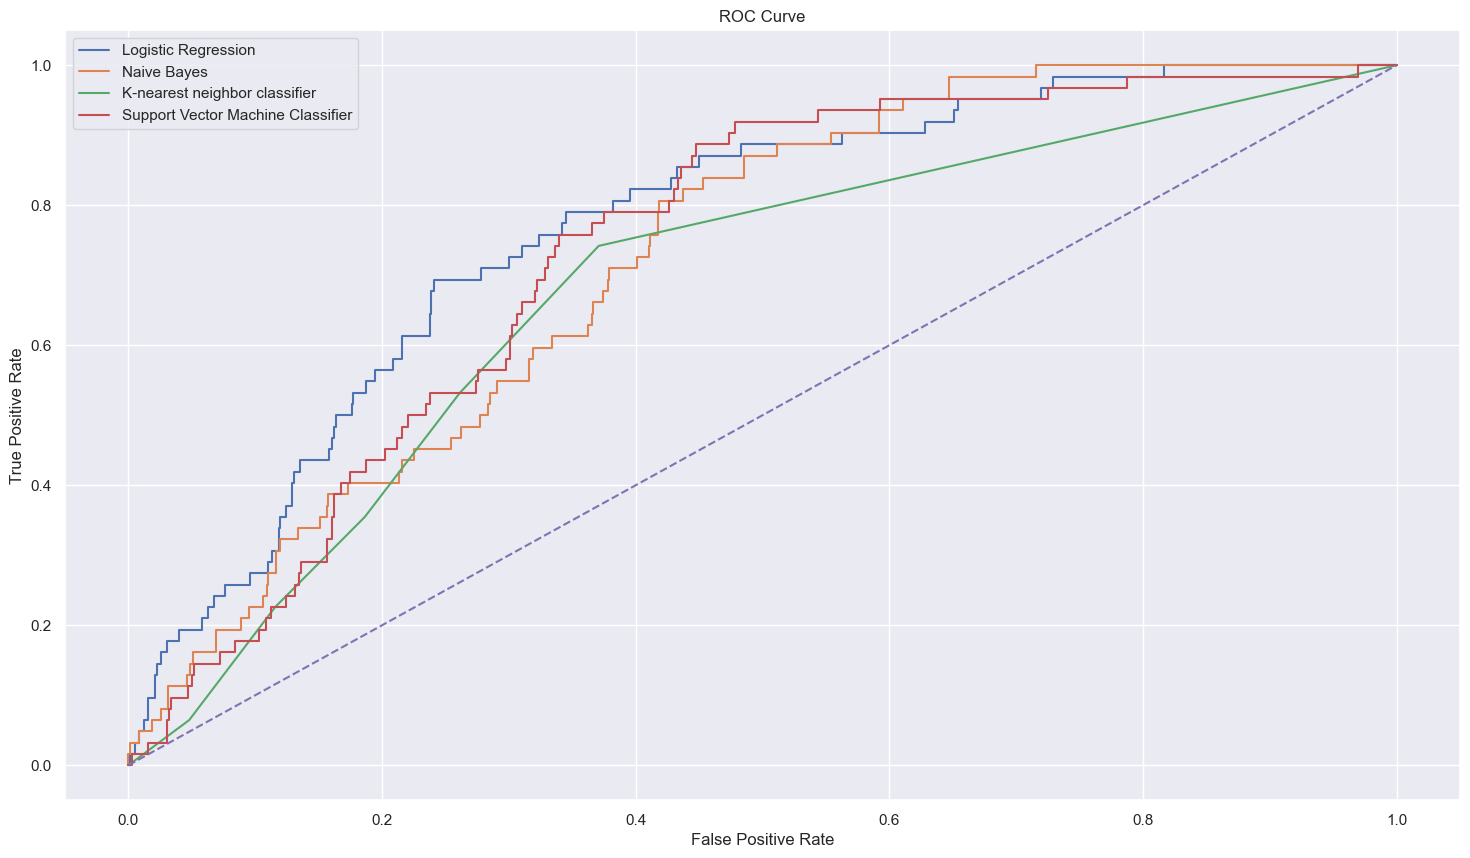

In [113]:
# plot the ROC curve

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_knn, tpr_knn, label='K-nearest neighbor classifier')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()